## Exo 7

C:\Users\kille\AppData\Local\Temp\ipykernel_8716\232807651.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


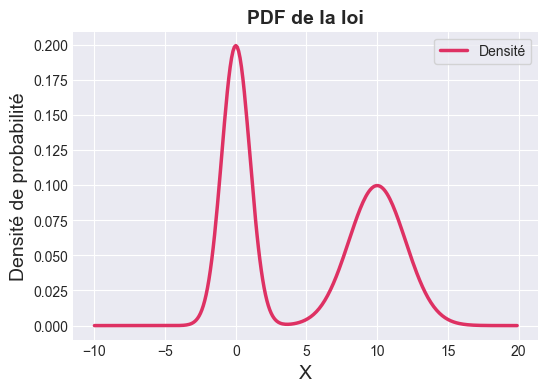

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
plt.style.use('seaborn-darkgrid')

# Données
x = np.arange(-10, 20, 0.1)
y = (0.5 / np.sqrt(2.0 * np.pi)) * np.exp(-0.5 * (x) ** 2) + (0.5 / np.sqrt(2.0 * np.pi * 4)) * np.exp(-0.5 * ((x - 10) ** 2 / 4))

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y, color='#DE3163', linewidth=2.5, linestyle='-', label='Densité')
ax.set_title("PDF de la loi", fontsize=14, fontweight='bold')
ax.set_xlabel("X", fontsize=14)
ax.set_ylabel("Densité de probabilité", fontsize=14)
ax.legend(frameon=True)
plt.show()

In [50]:
def kth_nearest_neighbor(x, A, K):
    M = (x - A)**2
    if np.ndim(A) > 1:
        M = np.sum(M, axis=1)
    d = np.sort(M)
    return np.sqrt(d[K])


def knn_density_1D(x,xn,k,N):
    """
        Parameters
        ----------
        x : places where we want to estimate the probability density
        xn : train data
        k : number of neighbours 
        N : total number of training samples 

        Returns
        -------
        float
            px, the estimated density, px = k/NV = k/N*(x-xNN)
    """
    px = np.ones(x.shape[0])
    for i in range(x.shape[0]):
        d = kth_nearest_neighbor(x[i], xn, k)
        px[i] = k / (2 * N * d)
    return px

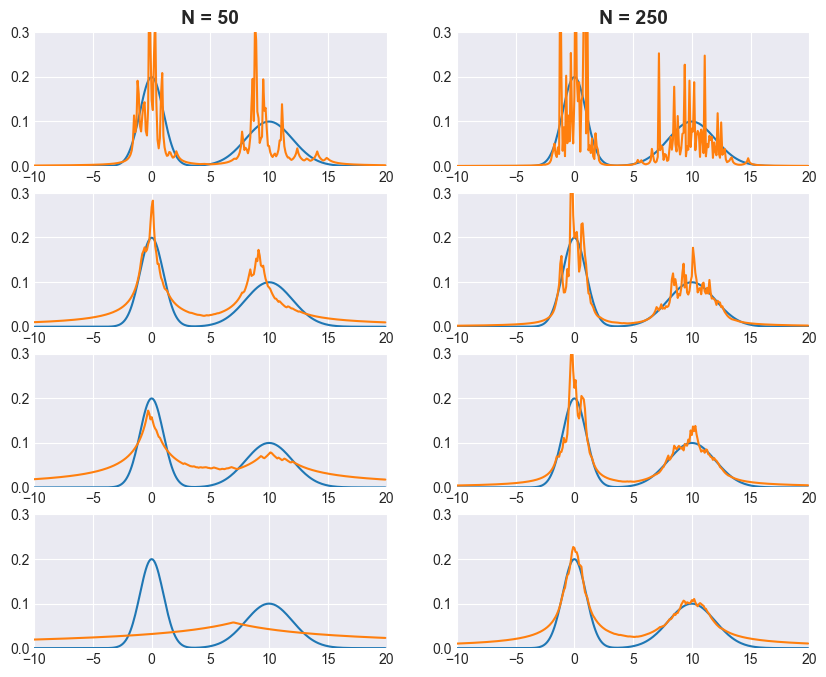

In [77]:
N = 50
xn = np.concatenate((np.random.normal(loc = 0, scale = 1, size=int(N/2)), np.random.normal(loc = 10, scale = 2, size=int(N/2))))

p1 = knn_density_1D(x,xn,1,N)
p2 = knn_density_1D(x,xn,10,N)
p3 = knn_density_1D(x,xn,20,N)
p4 = knn_density_1D(x,xn,49,N)

N = 250
xn = np.concatenate((np.random.normal(loc = 0, scale = 1, size=int(N/2)), np.random.normal(loc = 10, scale = 2, size=int(N/2))))

p5 = knn_density_1D(x,xn,1,N)
p6 = knn_density_1D(x,xn,10,N)
p7 = knn_density_1D(x,xn,20,N)
p8 = knn_density_1D(x,xn,50,N)

fig, axs = plt.subplots(4, 2, figsize=(10,8))
for ax in axs.flat:
    ax.set_xlim([-10, 20])  # Limite des axes x
    ax.set_ylim([0, 0.3])   # Limite des axes y
axs[0,0].plot(x, y, x , p1)
axs[0,0].set_title("N = 50", fontsize=14, fontweight='bold')
axs[1,0].plot(x,y,x,p2)
axs[2,0].plot(x,y,x,p3)
axs[3,0].plot(x,y,x,p4)
axs[0,1].plot(x, y, x , p5)
axs[0,1].set_title("N = 250", fontsize=14, fontweight='bold')
axs[1,1].plot(x,y,x,p6)
axs[2,1].plot(x,y,x,p7)
axs[3,1].plot(x,y,x,p8)
plt.show()

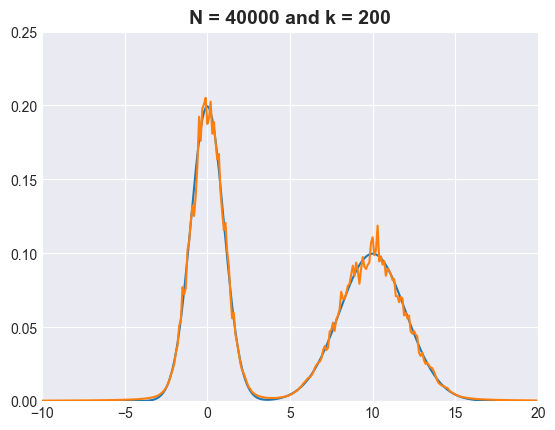

In [87]:
N = 40000
k = int(np.sqrt(N))
xn = np.concatenate((np.random.normal(loc = 0, scale = 1, size=int(N/2)), np.random.normal(loc = 10, scale = 2, size=int(N/2))))

p1 = knn_density_1D(x,xn,k,N)

plt.figure()
plt.plot(x, y, x , p1)
plt.xlim(-10, 20)
plt.ylim(0,0.25)
plt.title("N = {:d} and k = {:d}".format(N,k), fontsize=14, fontweight='bold')
plt.show()